In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

%matplotlib inline

# Airplane rentals by the Brazilian Congress

I'm looking at how much Brazilian members of the Chamber of Deputies (the lower house) spend on airplane rentals. 
I want to know which deputy spends the most, to which party they're affiliated, what states they come from, what is the most hired airplane company and in what year and month deputies spent the most on airplane rentals. 

My data came from [brasil.io](https://brasil.io/dataset/gastos-deputados/cota_parlamentar?search=&numano=&nummes=&datemissao=&txnomeparlamentar=&sgpartido=&sguf=&txtdescricao=LOCA%C3%87%C3%83O+OU+FRETAMENTO+DE+AERONAVES&txtcnpjcpf=&txtfornecedor=&vlrliquido=).

On the website, you can find the codebook with the description of what each column means.

In [6]:
df = pd.read_csv("gastos-deputados.csv")
df.tail()

,numano,nummes,datemissao,txnomeparlamentar,sgpartido,sguf,txtdescricao,txtcnpjcpf,txtfornecedor,vlrdocumento,vlrglosa,vlrliquido
1771,2013,11,2013-11-22 00:00:00+00:00,PAES LANDIM,PTB,PI,LOCAÇÃO OU FRETAMENTO DE AERONAVES,03003930000197,CEARÁ TAXI AÉREO LTDA,15560.0,0.0,10855.0
1772,2013,11,2013-11-22 00:00:00+00:00,LUIZ FERNANDO FARIA,PP,MG,LOCAÇÃO OU FRETAMENTO DE AERONAVES,05569646000108,CARLINHOS ULTRALEVES LTDA,6700.0,0.0,6700.0
1773,2013,11,2013-11-22 00:00:00+00:00,ROBERTO BALESTRA,PP,GO,LOCAÇÃO OU FRETAMENTO DE AERONAVES,12082807000108,M.B. Locação de Aeronaves e Veiculos,4800.0,0.0,4800.0
1774,2013,10,2013-11-19 00:00:00+00:00,PEDRO CHAVES,MDB,GO,LOCAÇÃO OU FRETAMENTO DE AERONAVES,02941268000153,AEROTEC TÁXI AÉREO LTDA,6600.0,0.0,6600.0
1775,2013,11,2013-11-18 00:00:00+00:00,JOÃO MAGALHÃES,PMDB,MG,LOCAÇÃO OU FRETAMENTO DE AERONAVES,10389202000120,ABELHAS AIR SERVIÇOS EM AVIAÇÃO LTDA-ME,3937.5,0.0,3937.5


In [4]:
# The df has data until 2013

df.numano.tail(3)

1773    2013
1774    2013
1775    2013
Name: numano, dtype: int64

## Let's answer a few questions. 

**1. How many rentals were made over the course of the past five years (2013 - 2018)?**

In [4]:
df.shape

(1776, 12)

In [5]:
# Looks like there were 1776 rentals since 2013.

**2. In what years did Hose representatives spend the most money?**

In [6]:
df.groupby('numano').vlrliquido.sum()

numano
2013     714143.82
2014    5176484.21
2015    2773230.11
2016    3400546.44
2017    2842802.46
2018    1299283.09
Name: vlrliquido, dtype: float64

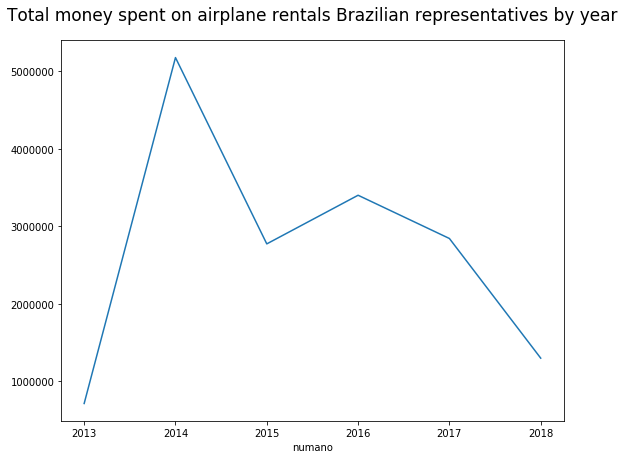

In [7]:
# Now let's see in what years deputies spent the most money: 

# by amount spent 

ax = df.groupby('numano').vlrliquido.sum().plot(figsize=(9,7))
ax.set_title('Total money spent on airplane rentals Brazilian representatives by year', pad=20)
ax.title.set_fontsize(17)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#ffffff', # colors the outside
    'axes.facecolor': '#ffffff', # colors the inside 
    'font.size': 12
})

In [8]:
# Looks like 2014 was by far the year with most spendings. 

In [5]:
df.groupby('numano').vlrliquido.count()

numano
2013     85
2014    571
2015    322
2016    356
2017    304
2018    138
Name: vlrliquido, dtype: int64

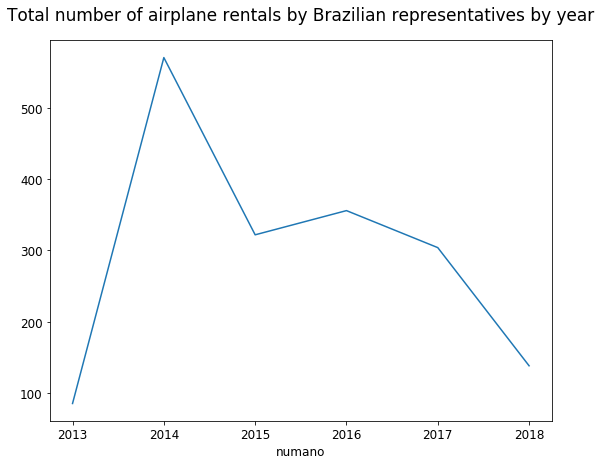

In [9]:
# by number of transactions

ax = df.groupby('numano').vlrliquido.count().plot(figsize=(9,7))
ax.set_title('Total number of airplane rentals by Brazilian representatives by year', pad=20)
ax.title.set_fontsize(17)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#ffffff', # colors the outside
    'axes.facecolor': '#ffffff', # colors the inside 
    'font.size': 12
})

In [10]:
# What's the month with the most rentals?

df.nummes.value_counts()

5     199
12    182
3     172
6     161
9     159
11    151
7     139
4     132
1     131
2     123
10    115
8     112
Name: nummes, dtype: int64

In [11]:
# Now let's look at what were the highest prices deputies have ever paid to rent airplanes. 

df.sort_values(by='vlrliquido', ascending=False).head(10)

,numano,nummes,datemissao,txnomeparlamentar,sgpartido,sguf,txtdescricao,txtcnpjcpf,txtfornecedor,vlrdocumento,vlrglosa,vlrliquido
1235,2014,10,2014-11-24 00:00:00+00:00,SABINO CASTELO BRANCO,PTB,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,02324940000161,MANAUS AEROTAXI PARTICIPAÇÕES LTDA,184500.0,0.0,184500.0
1137,2014,12,2014-12-30 00:00:00+00:00,SABINO CASTELO BRANCO,PTB,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,02324940000161,MANAUS AEROTAXI PARTICIPAÇÕES LTDA,92655.0,0.0,91546.1
1561,2014,4,2014-04-06 00:00:00+00:00,ELIENE LIMA,PSD,MT,LOCAÇÃO OU FRETAMENTO DE AERONAVES,97527614000168,S. L. DE SOUZA TURISMO - ME,82000.0,0.0,82000.0
1722,2013,11,2013-12-13 00:00:00+00:00,SABINO CASTELO BRANCO,PTB,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,02324940000161,MANAUS AEROTAXI PARTICIPAÇÕES LTDA,79000.0,0.0,79000.0
1407,2014,6,2014-06-25 00:00:00+00:00,SILAS CÂMARA,PRB,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,03293432000126,PARINTINS TAXI AEREO LTDA,68000.0,0.0,68000.0
1600,2014,2,2014-03-18 00:00:00+00:00,SABINO CASTELO BRANCO,PTB,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,02324940000161,MANAUS AEROTAXI PARTICIPAÇÕES LTDA,62000.0,0.0,62000.0
1291,2014,10,2014-10-27 00:00:00+00:00,RAUL LIMA,PP,RR,LOCAÇÃO OU FRETAMENTO DE AERONAVES,***34555***,RODRIGO MARTINS DE MELLO,55000.0,0.0,55000.0
1142,2014,12,2014-12-26 00:00:00+00:00,LUCIO VIEIRA LIMA,MDB,BA,LOCAÇÃO OU FRETAMENTO DE AERONAVES,14674451000119,ATA - AEROTAXI ABAETÉ LTDA.,45000.0,0.0,45000.0
1446,2014,6,2014-06-05 00:00:00+00:00,ÂNGELO AGNOLIN,PDT,TO,LOCAÇÃO OU FRETAMENTO DE AERONAVES,***18300***,Mauro Boaventura de Souza,68200.0,29000.0,39200.0
421,2017,2,2017-02-08 00:00:00+00:00,GIACOBO,PR,PR,LOCAÇÃO OU FRETAMENTO DE AERONAVES,75543611000185,HELISUL TAXI AEREO LTDA.,39000.0,0.0,39000.0


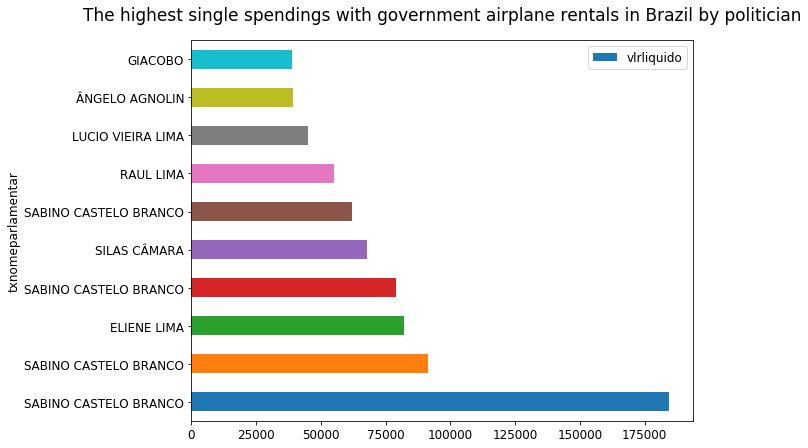

In [12]:
# Let's plot that. 

ax = df.sort_values(by='vlrliquido', ascending=False).head(10).plot(kind='barh', x='txnomeparlamentar', y='vlrliquido', figsize=(9,7))
ax.set_title('The highest single spendings with government airplane rentals in Brazil by politician', pad=20)
ax.title.set_fontsize(17)

**3. Who are the representatives who have spent the most money on airplane rentals?**

In [13]:
df.groupby('txnomeparlamentar').vlrliquido.sum().sort_values(ascending=False).head(10)

txnomeparlamentar
ÁTILA LINS               1223431.77
PAES LANDIM               666535.07
SILAS CÂMARA              542987.20
NILSON PINTO              517850.00
SABINO CASTELO BRANCO     486950.01
JUTAHY JUNIOR             477759.51
GIACOBO                   476520.00
JÚLIO CESAR               435967.00
SÁGUAS MORAES             416015.83
IRACEMA PORTELLA          378042.60
Name: vlrliquido, dtype: float64

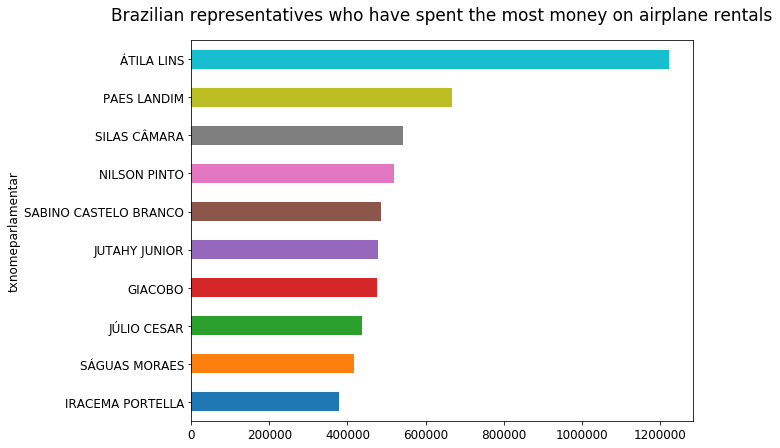

In [14]:
ax = df.groupby('txnomeparlamentar').vlrliquido.sum().sort_values(ascending=False).head(10).sort_values(ascending=True).plot(kind='barh', figsize=(9,7))
ax.set_title('Brazilian representatives who have spent the most money on airplane rentals', pad=20)
ax.title.set_fontsize(17)

**4. Who are the 10 deputies who have made the highest number of total transactions?**

In [15]:
df.txnomeparlamentar.value_counts().head(10).sort_values(ascending=False)

ÁTILA LINS              109
NILSON PINTO             63
FRANCISCO CHAPADINHA     60
JÚLIO CESAR              50
PAES LANDIM              49
SÁGUAS MORAES            48
WILSON FILHO             45
NILSON LEITÃO            41
JUTAHY JUNIOR            37
THIAGO PEIXOTO           34
Name: txnomeparlamentar, dtype: int64

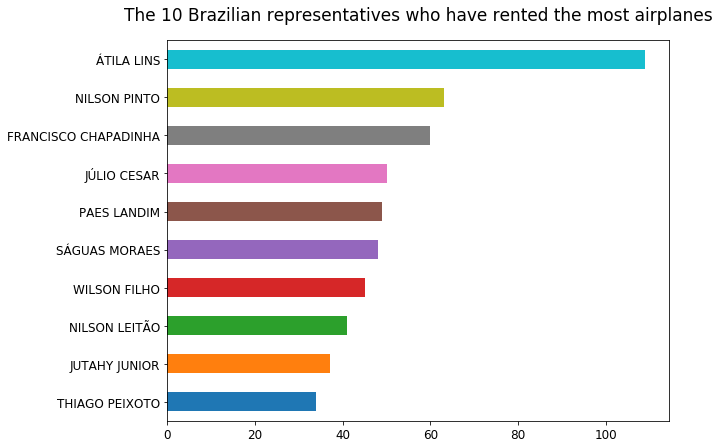

In [16]:
ax = df.txnomeparlamentar.value_counts().head(10).sort_values(ascending=True).plot(kind='barh', figsize=(9,7))
ax.set_title('The 10 Brazilian representatives who have rented the most airplanes', pad=20)
ax.title.set_fontsize(17)

In [17]:
# Looks like Átila Lins has rented an airplane 109 times. :O

In [55]:
# Funny thing is that, even though the Brazilian Chamber of Deputies has 530 representatives, 
# only 46 have rented airplanes in 2018

df_2018.txnomeparlamentar.value_counts().reset_index().shape

(46, 2)

In [13]:
# in 2017, the number was 68

df_2017.txnomeparlamentar.value_counts().reset_index().shape

(68, 2)

In [8]:
df.txnomeparlamentar.value_counts().reset_index().shape

(191, 2)

**Why only a few representatives rent airplanes????**

**5. What states spend the most on airplane rentals?**

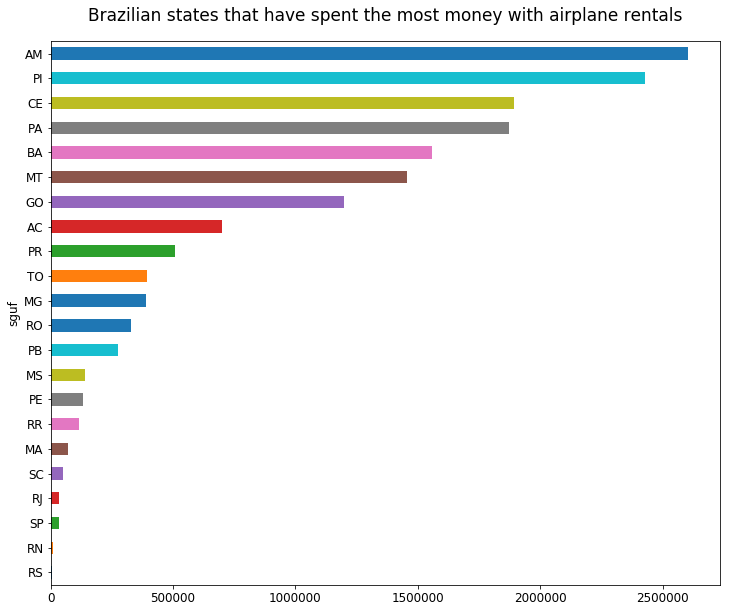

In [20]:
ax = df.groupby('sguf').vlrliquido.sum().sort_values(ascending=True).plot(kind='barh', figsize=(12,10))
ax.set_title('Brazilian states that have spent the most money with airplane rentals', pad=20)
ax.title.set_fontsize(17)

**6. And what party spends the most?**

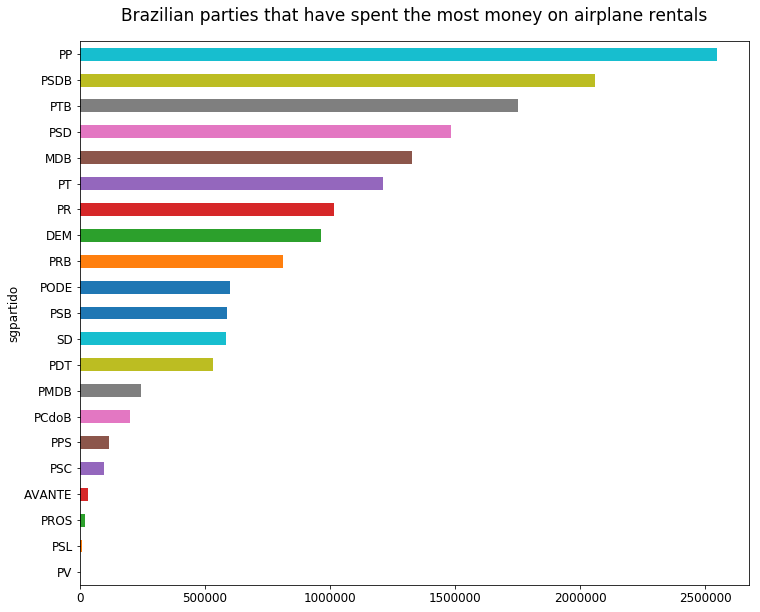

In [21]:
ax = df.groupby('sgpartido').vlrliquido.sum().sort_values(ascending=True).plot(kind='barh', figsize=(12,10))
ax.set_title('Brazilian parties that have spent the most money on airplane rentals', pad=20)
ax.title.set_fontsize(17)

## Now, let's narrow down the data to rentals made only in 2018.

In [4]:
df_2018 = df[df.numano == 2018]
df_2018.head()

,numano,nummes,datemissao,txnomeparlamentar,sgpartido,sguf,txtdescricao,txtcnpjcpf,txtfornecedor,vlrdocumento,vlrglosa,vlrliquido
0,2018,6,2018-06-25 00:00:00+00:00,GIACOBO,PR,PR,LOCAÇÃO OU FRETAMENTO DE AERONAVES,75543611000185,HELISUL TAXI AEREO LTDA,13400.0,0.0,13400.0
1,2018,6,2018-06-11 00:00:00+00:00,ÁTILA LIRA,PSB,PI,LOCAÇÃO OU FRETAMENTO DE AERONAVES,03003930000197,CEARA TAXI AEREO LTDA,7240.0,0.0,7240.0
2,2018,6,2018-06-08 00:00:00+00:00,JUTAHY JUNIOR,PSDB,BA,LOCAÇÃO OU FRETAMENTO DE AERONAVES,14674451000119,ATA AEROTAXI ABAETE LTDA,7500.0,0.0,7500.0
3,2018,6,2018-06-08 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,03090756000167,AMAZONAVES TAXI AEREO LTDA,20000.0,0.0,20000.0
4,2018,6,2018-06-04 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,02324940000161,MANAUS AEROTAXI PARTICIPACOES LTDA,7500.0,0.0,7500.0


In [237]:
df_2018.sort_values(by='vlrliquido', ascending=False).head(10)

,numano,nummes,datemissao,txnomeparlamentar,sgpartido,sguf,txtdescricao,txtcnpjcpf,txtfornecedor,vlrdocumento,vlrglosa,vlrliquido
116,2018,1,2018-02-07 00:00:00+00:00,SILAS CÂMARA,PRB,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,03090756000167,AMAZONAVES TAXI AEREO LTDA,72400.0,0.0,36441.8
117,2018,1,2018-02-07 00:00:00+00:00,SILAS CÂMARA,PRB,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,03090756000167,AMAZONAVES TAXI AEREO LTDA,72400.0,0.0,35958.2
88,2018,3,2018-03-12 00:00:00+00:00,LUCIO VIEIRA LIMA,MDB,BA,LOCAÇÃO OU FRETAMENTO DE AERONAVES,14674451000119,ATA AEROTAXI ABAETE LTDA,35000.0,0.0,35000.0
81,2018,3,2018-03-19 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,04984400000130,CTA - CLEITON TAXI AEREO LTDA,32160.0,0.0,32160.0
28,2018,5,2018-05-07 00:00:00+00:00,VALTENIR PEREIRA,MDB,MT,LOCAÇÃO OU FRETAMENTO DE AERONAVES,***83531***,Leandro Levinali Ecco,27285.0,0.0,27285.0
44,2018,4,2018-04-26 00:00:00+00:00,VALTENIR PEREIRA,MDB,MT,LOCAÇÃO OU FRETAMENTO DE AERONAVES,***83531***,Leandro Levinali Ecco,26775.0,0.0,26775.0
136,2018,2,2018-01-22 00:00:00+00:00,SILAS CÂMARA,PRB,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,03090756000167,AMAZONAVES TAXI AEREO LTDA,25000.0,0.0,25000.0
64,2018,3,2018-04-09 00:00:00+00:00,JUTAHY JUNIOR,PSDB,BA,LOCAÇÃO OU FRETAMENTO DE AERONAVES,14674451000119,ATA AEROTAXI ABAETE LTDA,22000.0,0.0,22000.0
102,2018,1,2018-02-23 00:00:00+00:00,PAES LANDIM,PTB,PI,LOCAÇÃO OU FRETAMENTO DE AERONAVES,03003930000197,CEARÁ TÁXI AÉREO LTDA,21734.0,0.0,21734.0
23,2018,5,2018-05-12 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,04984400000130,CTA - CLEITON TAXI AEREO LTDA,21700.0,0.0,21700.0


**7. How much money was spent in total on airplane rentals in 2018?**

In [23]:
df_2018.vlrliquido.sum()

1299283.0899999999

In [ ]:
# MORE THAN ONE MILLION REAIS! 

**8. Who are the 10 representatives who have rented the most airplanes in 2018?**

In [24]:
df_2018.txnomeparlamentar.value_counts().head(10)

ÁTILA LINS              11
WLADIMIR COSTA          11
NILSON LEITÃO            8
FRANCISCO CHAPADINHA     6
PAUDERNEY AVELINO        6
PAES LANDIM              6
HÉLIO LEITE              6
JUTAHY JUNIOR            5
GIACOBO                  4
CARLOS SOUZA             4
Name: txnomeparlamentar, dtype: int64

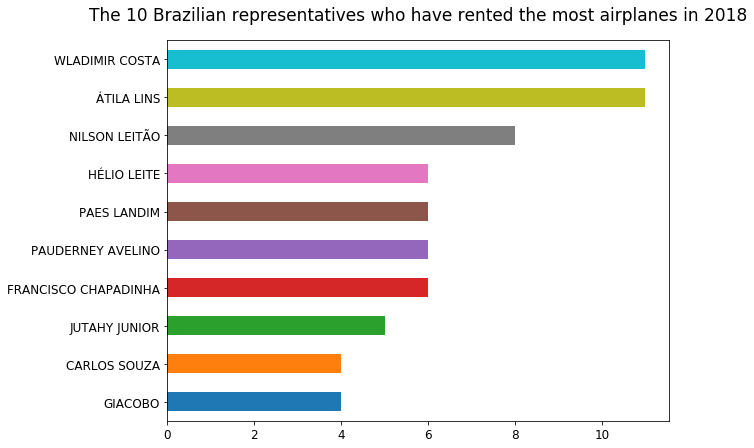

In [25]:
ax = df_2018.txnomeparlamentar.value_counts(ascending=False).head(10).sort_values(ascending=True).plot(kind='barh', figsize=(9,7))
ax.set_title('The 10 Brazilian representatives who have rented the most airplanes in 2018', pad=20)
ax.title.set_fontsize(17)

In [ ]:
# Átila is still on top. He seems to really like flying.

**9. And which representatives have spent the most money on airplane rentals in 2018?**

In [26]:
df_2018.groupby('txnomeparlamentar').vlrliquido.sum().sort_values(ascending=False).head(10)

txnomeparlamentar
ÁTILA LINS           126819.80
SILAS CÂMARA         107400.00
PAES LANDIM           84966.01
NILSON LEITÃO         69302.10
WLADIMIR COSTA        68300.00
GIACOBO               61800.00
JUTAHY JUNIOR         57500.00
VALTENIR PEREIRA      54060.00
LUCIO VIEIRA LIMA     51200.00
CARLOS SOUZA          40550.00
Name: vlrliquido, dtype: float64

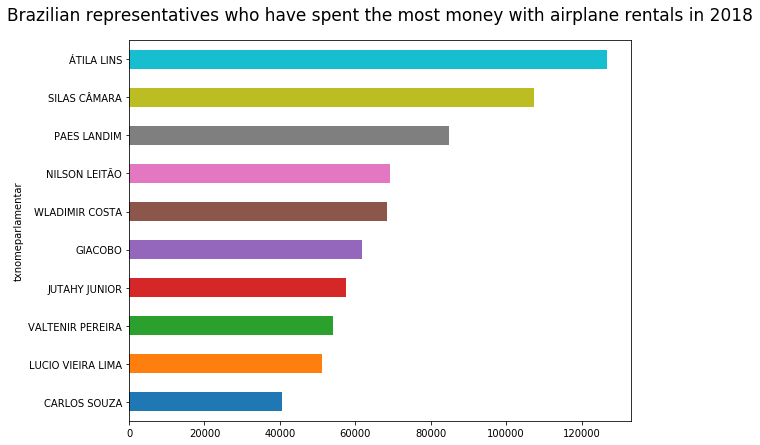

In [5]:
ax = df_2018.groupby('txnomeparlamentar').vlrliquido.sum().sort_values(ascending=False).head(10).sort_values(ascending=True).plot(kind='barh', figsize=(9,7))
ax.set_title('Brazilian representatives who have spent the most money with airplane rentals in 2018', pad=20)
ax.title.set_fontsize(17)

## Same thing for 2017

In [11]:
df_2017 = df[df.numano == 2017]
df_2017.head()

,numano,nummes,datemissao,txnomeparlamentar,sgpartido,sguf,txtdescricao,txtcnpjcpf,txtfornecedor,vlrdocumento,vlrglosa,vlrliquido
138,2017,12,2017-12-28 00:00:00+00:00,RAIMUNDO GOMES DE MATOS,PSDB,CE,LOCAÇÃO OU FRETAMENTO DE AERONAVES,01274847000127,TERRAL TAXI AEREO LTDA - EPP,10750.0,0.0,330.42
139,2017,12,2017-12-28 00:00:00+00:00,RAIMUNDO GOMES DE MATOS,PSDB,CE,LOCAÇÃO OU FRETAMENTO DE AERONAVES,01274847000127,TERRAL TAXI AEREO LTDA - EPP,10750.0,0.0,1.65
140,2017,12,2017-12-28 00:00:00+00:00,RAIMUNDO GOMES DE MATOS,PSDB,CE,LOCAÇÃO OU FRETAMENTO DE AERONAVES,01274847000127,TERRAL TAXI AEREO LTDA - EPP,10750.0,0.0,10267.80
141,2017,12,2017-12-28 00:00:00+00:00,RAIMUNDO GOMES DE MATOS,PSDB,CE,LOCAÇÃO OU FRETAMENTO DE AERONAVES,01274847000127,TERRAL TAXI AEREO LTDA - EPP,10750.0,0.0,150.10
142,2017,12,2017-12-27 00:00:00+00:00,ANTONIO BRITO,PSD,BA,LOCAÇÃO OU FRETAMENTO DE AERONAVES,14674451000119,ATA AEROTAXI ABAETE LTDA,7000.0,0.0,7000.00


In [28]:
df_2017.vlrliquido.sum()

2842802.46

In [30]:
df_2017.txnomeparlamentar.value_counts().head(10)

FRANCISCO CHAPADINHA       26
ÁTILA LINS                 22
ADAIL CARNEIRO             12
NILSON PINTO               11
NILSON LEITÃO              11
GIACOBO                    10
PAES LANDIM                10
SÁGUAS MORAES              10
DANIEL VILELA               9
RAIMUNDO GOMES DE MATOS     9
Name: txnomeparlamentar, dtype: int64

In [29]:
df_2017.groupby('txnomeparlamentar').vlrliquido.sum().sort_values(ascending=False).head(10)

txnomeparlamentar
ÁTILA LINS              276899.97
GIACOBO                 211000.00
PAES LANDIM             163115.00
FRANCISCO CHAPADINHA    163100.00
GENECIAS NORONHA         96025.60
NILSON LEITÃO            91219.99
SILAS CÂMARA             84750.00
JÚLIO CESAR              82050.00
SÁGUAS MORAES            82049.00
ADAIL CARNEIRO           81500.00
Name: vlrliquido, dtype: float64

## And who has been receiving all this money?

In [31]:
# by number of transactions

df.txtfornecedor.value_counts().head(20)

TOP LINE TAXI AEREO LTDA                 123
CEARÁ TAXI AÉREO LTDA                    106
AEROTEC TÁXI AÉREO LTDA                   88
STILUS TAXI AÉREO                         62
CTA CLEITON TÁXI AÉREO LTDA               60
SANTARÉM TÁXI AÉREO LTDA                  57
M.B. Locação de Aeronaves e Veiculos      53
ATA - AEROTAXI ABAETÉ LTDA.               48
MARIA DO CARMO MARIZ DE LIMA              45
RICO TAXI AEREO LTDA                      44
SETE TAXI AEREO                           41
NORTH STAR TAXI AÉREO LTDA                37
taxi aéreo fortaleza ltda                 36
EASY TAXI AEREO LTDA                      36
E.D. Semensato Comércio e Transportes     36
SOLAR TAXI AEREO                          35
AMAZONAVES TAXI AÉREO LTDA                34
TERRAL TAXI AÉREO                         30
APOLO TAXI AÉREO                          28
UIRAPURU TAXI AEREO LTDA                  28
Name: txtfornecedor, dtype: int64

In [ ]:
# TOP LINE TAXI AEREO LTDA seems to be the favorite

In [32]:
# by amount received

df.groupby('txtfornecedor').vlrliquido.sum().sort_values(ascending=False).head(10)

txtfornecedor
TOP LINE TAXI AEREO LTDA              1099082.67
CEARÁ TAXI AÉREO LTDA                 1071823.65
ATA - AEROTAXI ABAETÉ LTDA.            585941.91
CTA CLEITON TÁXI AÉREO LTDA            576211.97
RICO TAXI AEREO LTDA                   575350.00
AEROTEC TÁXI AÉREO LTDA                548142.35
MANAUS AEROTAXI PARTICIPAÇÕES LTDA     494950.01
STILUS TAXI AÉREO                      493000.00
taxi aéreo fortaleza ltda              427555.53
AMAZONAVES TAXI AÉREO LTDA             408737.20
Name: vlrliquido, dtype: float64

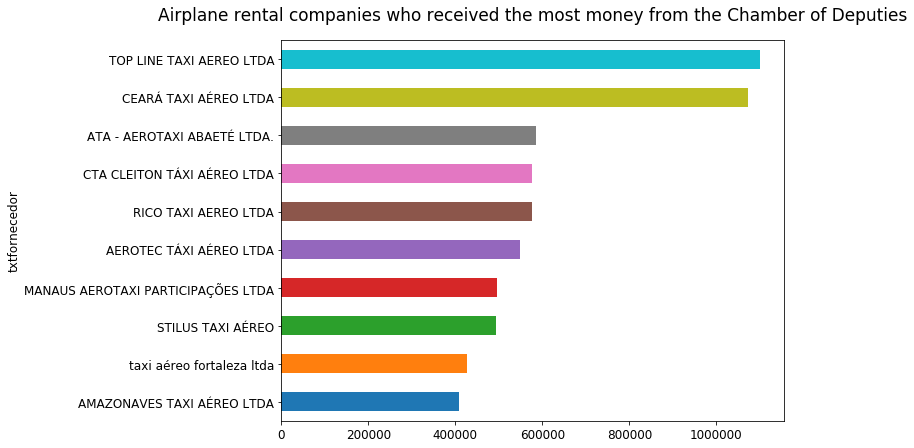

In [33]:
ax = df.groupby('txtfornecedor').vlrliquido.sum().sort_values(ascending=False).head(10).sort_values(ascending=True).plot(kind='barh', figsize=(9,7))
ax.set_title('Airplane rental companies who received the most money from the Chamber of Deputies', pad=20)
ax.title.set_fontsize(17)

ax.set_facecolor('#FFFFFF')

In [34]:
df.numano.dtype

dtype('int64')

## Let's make pretty charts! :D

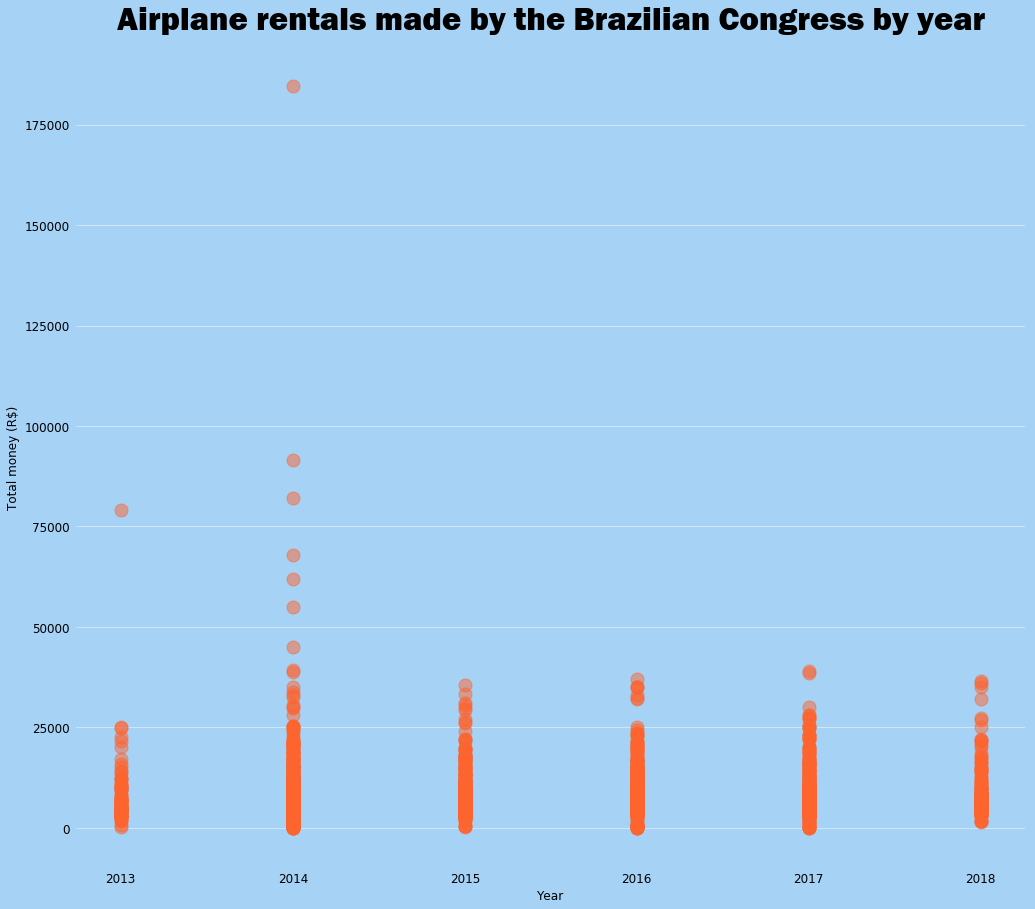

In [39]:
ax = df.plot.scatter(s=170, x='numano', y='vlrliquido', color='#FE642E', alpha=0.5, figsize=(17,15))
ax.set_title('Airplane rentals made by the Brazilian Congress by year', pad=20)
ax.set_ylabel('Total money (R$)')    
ax.set_xlabel('Year')
ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
#ax.set_facecolor('#A6D2F6')

ax.grid(True, axis='y', color='white', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#A6D2F6', # colors the outside
    'axes.facecolor': '#A6D2F6', # colors the inside 
    'font.size': 12
})

sharex=False 


#plt.savefig('airplanes.pdf')


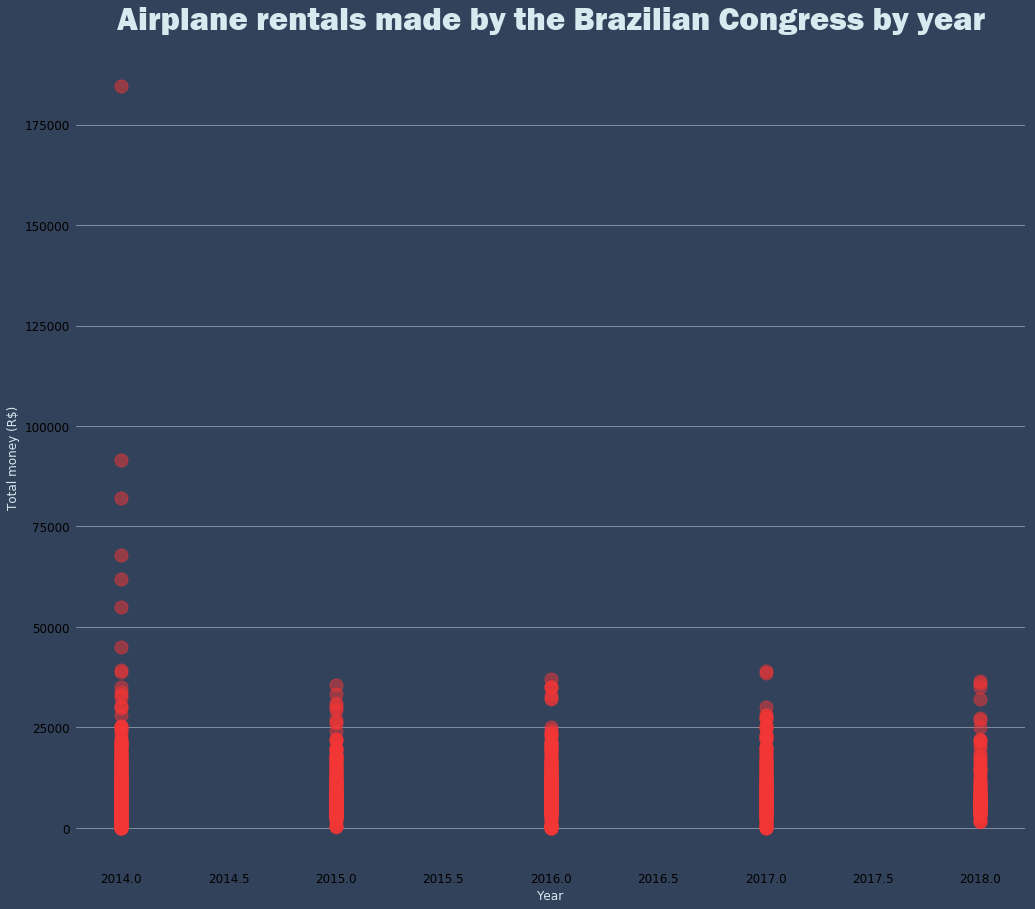

In [165]:
ax = df_2014_2018.plot.scatter(s=170, x='numano', y='vlrliquido', color='#f33535', alpha=0.5, figsize=(17,15))
ax.set_title('Airplane rentals made by the Brazilian Congress by year', pad=20)
ax.set_ylabel('Total money (R$)')    
ax.set_xlabel('Year')
ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
#ax.set_facecolor('#A6D2F6')

ax.grid(True, axis='y', color='#d8e9f0', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#33425b', # colors the outside
    'axes.facecolor': '#33425b', # colors the inside 
    'font.size': 12,
    'text.color': '#d8e9f0',
    'axes.labelcolor': '#d8e9f0'
})

sharex=False 


#plt.savefig('airplanes-dark.pdf')


In [40]:
df.datemissao.head(5)

0    2018-06-25 00:00:00+00:00
1    2018-06-11 00:00:00+00:00
2    2018-06-08 00:00:00+00:00
3    2018-06-08 00:00:00+00:00
4    2018-06-04 00:00:00+00:00
Name: datemissao, dtype: object

In [41]:
df['data'] = pd.to_datetime(df['datemissao'], format="%Y-%m-%d") 
df.head()

,numano,nummes,datemissao,txnomeparlamentar,sgpartido,sguf,txtdescricao,txtcnpjcpf,txtfornecedor,vlrdocumento,vlrglosa,vlrliquido,data
0,2018,6,2018-06-25 00:00:00+00:00,GIACOBO,PR,PR,LOCAÇÃO OU FRETAMENTO DE AERONAVES,75543611000185,HELISUL TAXI AEREO LTDA,13400.0,0.0,13400.0,2018-06-25
1,2018,6,2018-06-11 00:00:00+00:00,ÁTILA LIRA,PSB,PI,LOCAÇÃO OU FRETAMENTO DE AERONAVES,03003930000197,CEARA TAXI AEREO LTDA,7240.0,0.0,7240.0,2018-06-11
2,2018,6,2018-06-08 00:00:00+00:00,JUTAHY JUNIOR,PSDB,BA,LOCAÇÃO OU FRETAMENTO DE AERONAVES,14674451000119,ATA AEROTAXI ABAETE LTDA,7500.0,0.0,7500.0,2018-06-08
3,2018,6,2018-06-08 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,03090756000167,AMAZONAVES TAXI AEREO LTDA,20000.0,0.0,20000.0,2018-06-08
4,2018,6,2018-06-04 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,02324940000161,MANAUS AEROTAXI PARTICIPACOES LTDA,7500.0,0.0,7500.0,2018-06-04


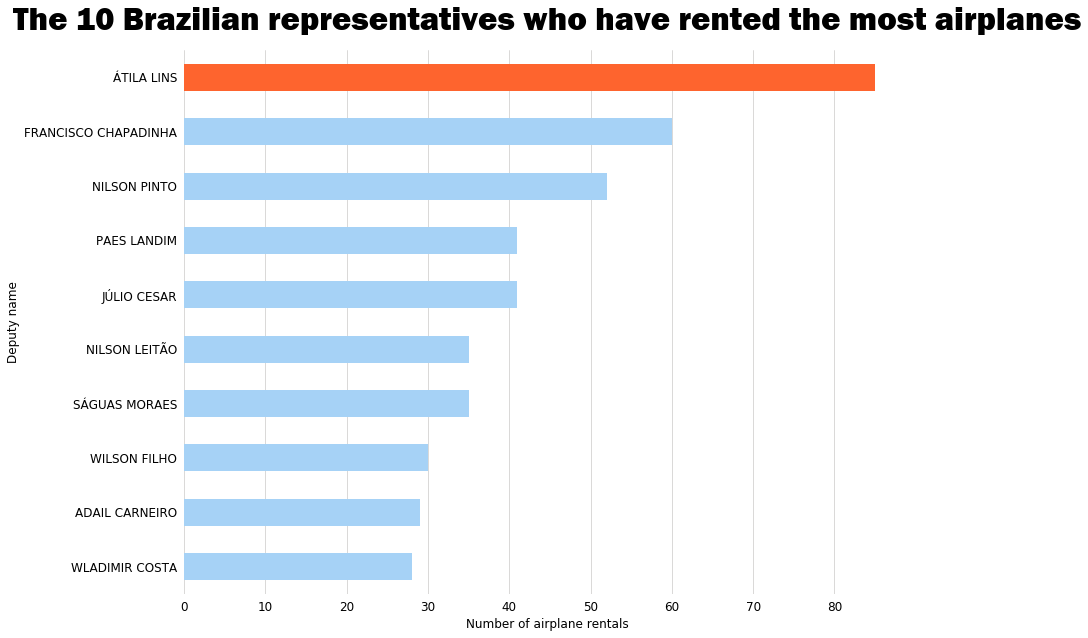

In [28]:
bar_colors = ['#A6D2F6', '#A6D2F6', '#A6D2F6', '#A6D2F6', '#A6D2F6', '#A6D2F6', '#A6D2F6', '#A6D2F6', '#A6D2F6', '#FE642E']

ax = df_2014_2018.txnomeparlamentar.value_counts().head(10).sort_values(ascending=True).plot(kind='barh', color=bar_colors, figsize=(13,10))
ax.set_title('The 10 Brazilian representatives who have rented the most airplanes', pad=20)
ax.title.set_fontsize(17)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('Deputy name')    
ax.set_xlabel('Number of airplane rentals')
ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
ax.grid(True, axis='x', color='#ADABAA', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#FFFFFF', # colors the outside
    'axes.facecolor': '#FFFFFF', # colors the inside 
    'font.size': 12
})

#plt.savefig('representatives.pdf')

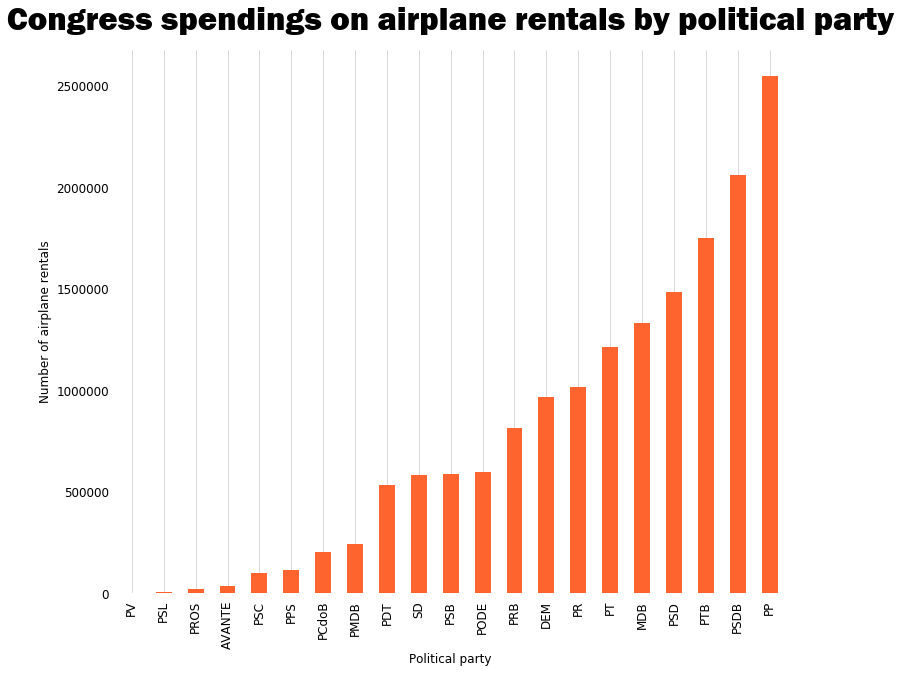

In [45]:
ax = df.groupby('sgpartido').vlrliquido.sum().sort_values(ascending=True).plot(kind='bar', color='#FE642E', figsize=(12,10))
ax.set_title('Congress spendings on airplane rentals by political party', pad=20)
ax.title.set_fontsize(17)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('Number of airplane rentals')    
ax.set_xlabel('Political party')
ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
ax.grid(True, axis='x', color='#ADABAA', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#FFFFFF', # colors the outside
    'axes.facecolor': '#FFFFFF', # colors the inside 
    'font.size': 12
})

In [61]:
df_2014_2018.groupby('txnomeparlamentar').vlrliquido.sum().sort_values(ascending=False)

txnomeparlamentar
ÁTILA LINS                  1016881.77
PAES LANDIM                  568224.03
GIACOBO                      453520.00
SILAS CÂMARA                 441087.20
NILSON PINTO                 436350.00
JÚLIO CESAR                  356567.00
SABINO CASTELO BRANCO        337950.01
FRANCISCO CHAPADINHA         309700.00
IRACEMA PORTELLA             305115.00
SÁGUAS MORAES                297573.33
NILSON LEITÃO                267244.09
WLADIMIR COSTA               266948.68
JUTAHY JUNIOR                266402.51
GENECIAS NORONHA             244439.10
ADAIL CARNEIRO               201200.00
RAIMUNDO GOMES DE MATOS      186934.97
WILSON FILHO                 173200.00
RODRIGO MARTINS              168920.00
ÁTILA LIRA                   165207.50
ODORICO MONTEIRO             162745.03
CÉSAR HALUM                  160166.70
DANIEL VILELA                154522.53
JOVAIR ARANTES               145585.00
MOISÉS DINIZ                 141299.53
JOSÉ AIRTON CIRILO           140710.00
ELIENE 

In [17]:
df_2014_2018.groupby('sgpartido').vlrliquido.sum()

sgpartido
AVANTE      33938.00
DEM        780897.10
MDB        977474.06
PCdoB      181785.92
PDT        260967.50
PMDB        85055.94
PODE       577408.00
PP        2008117.15
PPS        100850.00
PR         968795.00
PRB        695903.90
PROS        19838.18
PSB        568472.53
PSC         64400.00
PSD        918079.07
PSDB      1545441.23
PSL          8800.00
PT         853955.12
PTB       1359984.04
SD         518921.12
Name: vlrliquido, dtype: float64

In [50]:
deputados_certo = pd.read_csv("partidos-congresso-atualizado.csv")
deputados_certo.head()

,sgpartido,bancada
0,MDB,51
1,PP,49
2,PSDB,49
3,DEM,43
4,PR,40


In [24]:
ax = deputados_certo.plot(kind='scatter', x='bancada;', y='vlrliquido', s=800, color='#f33535', alpha=0.7, figsize=(17,15))
ax.set_title('How much each party spent', pad=40)
ax.set_ylabel('Total money (R$)')    
ax.set_xlabel('Number of party representatives')
ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
#ax.set_facecolor('#A6D2F6')

ax.grid(True, axis='y', color='#d8e9f0', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#33425b', # colors the outside
    'axes.facecolor': '#33425b', # colors the inside 
    'font.size': 12,
    'text.color': '#d8e9f0',
    'axes.labelcolor': '#d8e9f0'
})

sharex=False 

ValueError: scatter requires x column to be numeric

In [23]:
df_partidos = df_2014_2018.groupby('sgpartido').vlrliquido.sum().sort_values(ascending=True).reset_index()

In [24]:
deputados_df = pd.read_csv("partidos-congresso-atualizado.csv")
deputados_df.head()

,sgpartido,bancada
0,MDB,51
1,PP,49
2,PSDB,49
3,DEM,43
4,PR,40


In [25]:
deputados_partidos = pd.merge(df_partidos, deputados_df, on='sgpartido')
deputados_partidos

,sgpartido,vlrliquido,bancada
0,PSL,8800.00,8
1,PROS,19838.18,11
2,AVANTE,33938.00,5
3,PSC,64400.00,9
4,PPS,100850.00,8
5,PCdoB,181785.92,10
6,PDT,260967.50,19
7,SD,518921.12,11
8,PSB,568472.53,26
9,PODE,577408.00,16


In [26]:
deputados_partidos.sort_values(by='vlrliquido', ascending=False)

,sgpartido,vlrliquido,bancada
20,PP,2008117.15,49
19,PSDB,1545441.23,49
18,PSDB,1545441.23,49
17,PTB,1359984.04,16
16,PTB,1359984.04,16
15,MDB,977474.06,51
14,PR,968795.00,40
13,PSD,918079.07,38
12,PT,853955.12,61
11,DEM,780897.10,43


In [27]:
deputados_partidos.sgpartido.value_counts()

PTB       2
PSDB      2
MDB       1
PT        1
PROS      1
PODE      1
AVANTE    1
PPS       1
PSD       1
PSL       1
DEM       1
PDT       1
PR        1
PP        1
PRB       1
PCdoB     1
PSB       1
SD        1
PSC       1
Name: sgpartido, dtype: int64

In [28]:
# dropping duplicate parties

deputados_partidos.drop_duplicates(inplace=True)

In [29]:
deputados_partidos.sgpartido.value_counts()

PTB       1
MDB       1
PT        1
PROS      1
PSDB      1
PODE      1
AVANTE    1
PPS       1
PSD       1
PSL       1
DEM       1
PDT       1
PR        1
PP        1
PRB       1
PCdoB     1
PSB       1
SD        1
PSC       1
Name: sgpartido, dtype: int64

/Users/julialedur/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Franklin Gothic Heavy'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


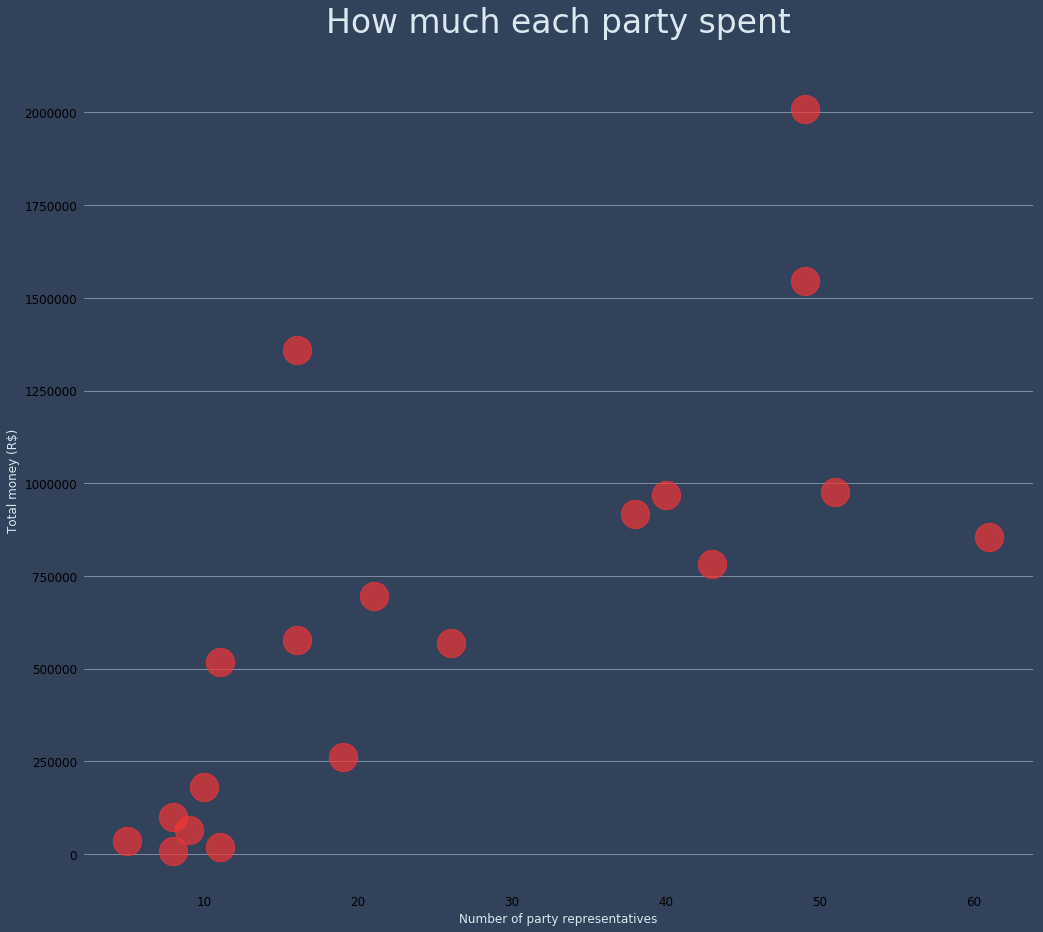

In [31]:
ax = deputados_partidos.plot(kind='scatter', x=' bancada', y='vlrliquido', s=800, color='#f33535', alpha=0.7, figsize=(17,15))
ax.set_title('How much each party spent', pad=40)
ax.set_ylabel('Total money (R$)')    
ax.set_xlabel('Number of party representatives')
ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
#ax.set_facecolor('#A6D2F6')

ax.grid(True, axis='y', color='#d8e9f0', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#33425b', # colors the outside
    'axes.facecolor': '#33425b', # colors the inside 
    'font.size': 12,
    'text.color': '#d8e9f0',
    'axes.labelcolor': '#d8e9f0'
})

sharex=False 


#plt.savefig('airplanes-parties.pdf')


In [60]:
df.head()

,numano,nummes,datemissao,txnomeparlamentar,sgpartido,sguf,txtdescricao,txtcnpjcpf,txtfornecedor,vlrdocumento,vlrglosa,vlrliquido,data
0,2018,6,2018-06-25 00:00:00+00:00,GIACOBO,PR,PR,LOCAÇÃO OU FRETAMENTO DE AERONAVES,75543611000185,HELISUL TAXI AEREO LTDA,13400.0,0.0,13400.0,2018-06-25
1,2018,6,2018-06-11 00:00:00+00:00,ÁTILA LIRA,PSB,PI,LOCAÇÃO OU FRETAMENTO DE AERONAVES,03003930000197,CEARA TAXI AEREO LTDA,7240.0,0.0,7240.0,2018-06-11
2,2018,6,2018-06-08 00:00:00+00:00,JUTAHY JUNIOR,PSDB,BA,LOCAÇÃO OU FRETAMENTO DE AERONAVES,14674451000119,ATA AEROTAXI ABAETE LTDA,7500.0,0.0,7500.0,2018-06-08
3,2018,6,2018-06-08 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,03090756000167,AMAZONAVES TAXI AEREO LTDA,20000.0,0.0,20000.0,2018-06-08
4,2018,6,2018-06-04 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,02324940000161,MANAUS AEROTAXI PARTICIPACOES LTDA,7500.0,0.0,7500.0,2018-06-04


##  Let's narrow down the df to the current term of office

obs.: the last elections for Congress were in October 5th of 2014.

In [22]:
df_2014_2018 = df[df.datemissao > '2014-10-05 00:00:00+00:00']
df_2014_2018.numano.value_counts()

2016    356
2015    322
2017    304
2014    200
2018    138
Name: numano, dtype: int64

In [ ]:
deputados_partidos = pd.merge(df_partidos, deputados_df, on='sgpartido')
deputados_partidos.dtypes


**Which month of the year had the highest average of rentals?**

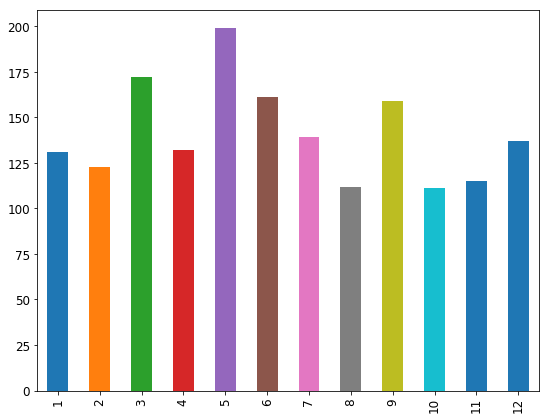

In [115]:
df_2014_2018.nummes.value_counts().sort_index().plot(kind='bar', figsize=(9,7))

Looks like it's May.

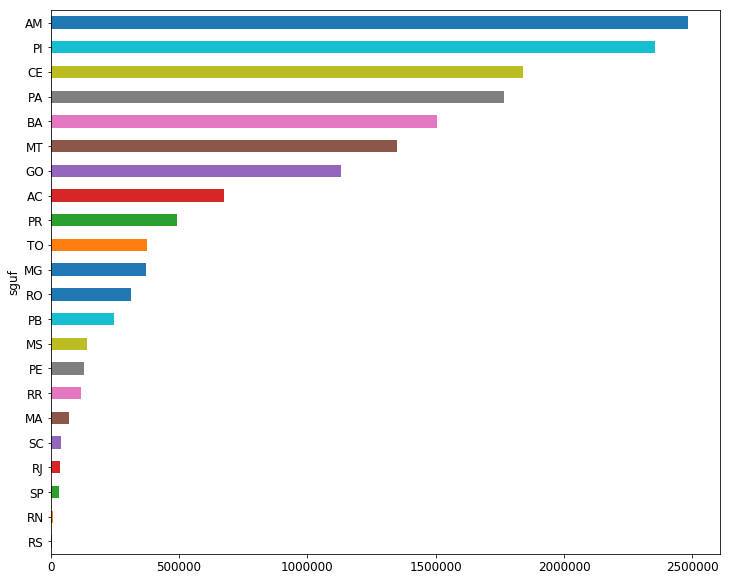

In [95]:
# How much was spent by state 

ax = df_2014_2018.groupby('sguf').vlrliquido.sum().sort_values(ascending=True).plot(kind='barh', figsize=(12,10))

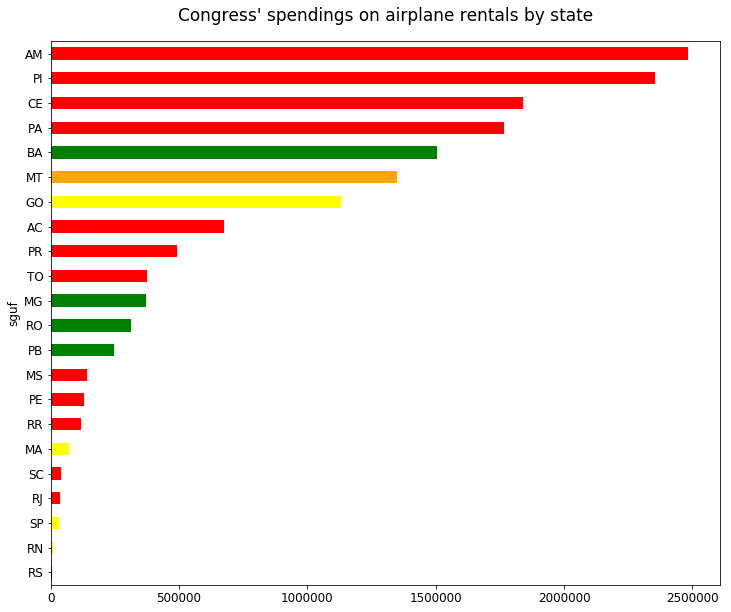

In [113]:
# coloring by region: 

def get_color(sguf):
    if sguf in ("AC", "AM", "PA", "AP","RR", "TO","RO"):
        return 'red'
    elif sguf in ("MA", "PI", "CE", "RN", "PE", "PB", "AL", "BA"):
        return 'yellow'
    elif sguf in ("MT", "MS", "GO"):
        return 'green'
    elif sguf in ("SP", "MG", "ES","RJ"):
        return 'orange'
    elif sguf in ("PR", "RS", "SC"):
        return 'blue'
    else:
        return 'black'
bar_colors = [get_color(sguf) for sguf in df_2014_2018.sguf]


ax = df_2014_2018.groupby('sguf').vlrliquido.sum().sort_values(ascending=True).plot(kind='barh', color=bar_colors, figsize=(12,10))
ax.set_title('Congress\' spendings on airplane rentals by state', pad=20)
ax.title.set_fontsize(17)

## Checking my assumptions

**Did Átila Lins rent airplanes in all six years?**

In [9]:
df_atila = df[df.txnomeparlamentar == 'ÁTILA LINS']
df_atila.head()

,numano,nummes,datemissao,txnomeparlamentar,sgpartido,sguf,txtdescricao,txtcnpjcpf,txtfornecedor,vlrdocumento,vlrglosa,vlrliquido
3,2018,6,2018-06-08 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,03090756000167,AMAZONAVES TAXI AEREO LTDA,20000.0,0.0,20000.0
4,2018,6,2018-06-04 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,02324940000161,MANAUS AEROTAXI PARTICIPACOES LTDA,7500.0,0.0,7500.0
12,2018,5,2018-05-28 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,02324940000161,MANAUS AEROTAXI PARTICIPACOES LTDA,6000.0,0.0,6000.0
23,2018,5,2018-05-12 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,04984400000130,CTA - CLEITON TAXI AEREO LTDA,21700.0,0.0,21700.0
32,2018,5,2018-05-07 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,02324940000161,MANAUS AEROTAXI PARTICIPACOES LTDA,4800.0,0.0,4800.0


In [48]:
df_atila.numano.value_counts()

2014    27
2016    25
2017    22
2015    20
2018    11
2013     4
Name: numano, dtype: int64

**How much did he spend in total?**

In [49]:
df_atila.vlrliquido.sum()

1223431.77

In [50]:
df_atila.sort_values('vlrliquido', ascending=False)

,numano,nummes,datemissao,txnomeparlamentar,sgpartido,sguf,txtdescricao,txtcnpjcpf,txtfornecedor,vlrdocumento,vlrglosa,vlrliquido,data
81,2018,3,2018-03-19 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,04984400000130,CTA - CLEITON TAXI AEREO LTDA,32160.0,0.0,32160.00,2018-03-19
485,2016,9,2016-11-11 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,04984400000130,CTA CLEITON TÁXI AÉREO LTDA,39600.0,0.0,32024.50,2016-11-11
965,2015,6,2015-07-06 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,04614277000165,RICO TAXI AEREO LTDA,30450.0,0.0,30450.00,2015-07-06
1193,2014,12,2014-12-10 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,04614277000165,RICO TAXI AEREO LTDA,28000.0,0.0,28000.00,2014-12-10
218,2017,9,2017-10-05 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,04614277000165,RICO TAXI AEREO LTDA,28000.0,0.0,28000.00,2017-10-05
250,2017,6,2017-08-30 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,04614277000165,RICO TAXI AEREO LTDA,27300.0,0.0,27300.00,2017-08-30
896,2015,9,2015-09-11 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,04614277000165,RICO TAXI AEREO LTDA,26250.0,0.0,26250.00,2015-09-11
462,2016,12,2016-12-13 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,04984400000130,CTA CLEITON TÁXI AÉREO LTDA,25000.0,0.0,25000.00,2016-12-13
840,2015,10,2015-10-31 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,03090756000167,AMAZONAVES TAXI AÉREO LTDA,22000.0,0.0,22000.00,2015-10-31
23,2018,5,2018-05-12 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,04984400000130,CTA - CLEITON TAXI AEREO LTDA,21700.0,0.0,21700.00,2018-05-12


**Is Amazonas on the top of the list of states that spend the most because of Átila? 
Or do other representatives from there also spend a lot?**

In [51]:
df_amazonas = df[df.sguf == 'AM']
df_amazonas.groupby('txnomeparlamentar').vlrliquido.sum()

txnomeparlamentar
ALFREDO NASCIMENTO          104400.00
ARTHUR VIRGÍLIO BISNETO      32800.00
CARLOS SOUZA                 73050.00
FRANCISCO PRACIANO           47400.00
PAUDERNEY AVELINO            89500.00
PROF. GEDEÃO AMORIM           4900.00
SABINO CASTELO BRANCO       486950.01
SILAS CÂMARA                542987.20
ÁTILA LINS                 1223431.77
Name: vlrliquido, dtype: float64

**Was Átila responsible for the majority of rentals associated with his party?**

In [52]:
df_pp = df[df.sgpartido == 'PP']
df_pp.txnomeparlamentar.value_counts()

ÁTILA LINS                109
IRACEMA PORTELLA           31
ROBERTO BALESTRA           29
CLAUDIO CAJADO              9
EZEQUIEL FONSECA            6
MAIA FILHO                  6
JOSÉ LINHARES               5
JOÃO LEÃO                   5
FERNANDO MONTEIRO           5
ESPERIDIÃO AMIN             4
GLADSON CAMELI              3
PAULO HENRIQUE LUSTOSA      3
MÁRIO NEGROMONTE            3
SANDES JÚNIOR               3
BETO SALAME                 2
ALEXANDRE BALDY             2
BETINHO ROSADO              2
ANDRÉ FUFUCA                2
MÁRIO NEGROMONTE JR.        2
LUIZ FERNANDO FARIA         2
HEULER CRUVINEL             1
RAUL LIMA                   1
Name: txnomeparlamentar, dtype: int64

In [53]:
# Why are the values for 2014 so high? 
# Who was spending money? 


df_2014 = df[df.numano == 2014]
df_2014.groupby('txnomeparlamentar').vlrliquido.sum().sort_values(ascending=False)

txnomeparlamentar
SABINO CASTELO BRANCO      373950.01
ÁTILA LINS                 233961.99
JUTAHY JUNIOR              231369.50
ELIENE LIMA                214600.00
SÁGUAS MORAES              134355.37
ANÍBAL GOMES               133000.00
WANDENKOLK GONÇALVES       132405.26
IRACEMA PORTELLA           129532.00
OZIEL OLIVEIRA             123600.00
HUGO NAPOLEÃO              123035.07
JÚLIO CESAR                115320.00
SILAS CÂMARA               101900.00
THIAGO PEIXOTO             101411.50
PAES LANDIM                101084.00
VILMAR ROCHA                95400.00
CLAUDIO CAJADO              95400.00
WILSON FILHO                94750.00
AMIR LANDO                  89500.00
WLADIMIR COSTA              89300.00
ANTONIO BALHMANN            86735.00
MARCELO CASTRO              83650.00
JOVAIR ARANTES              82195.00
ARNON BEZERRA               80125.00
NILSON PINTO                79500.00
ODAIR CUNHA                 77841.60
ROBERTO BALESTRA            76831.60
GIOVANNI QUEIROZ    

In [54]:
df_2014.sort_values(by='vlrliquido', ascending=False)

,numano,nummes,datemissao,txnomeparlamentar,sgpartido,sguf,txtdescricao,txtcnpjcpf,txtfornecedor,vlrdocumento,vlrglosa,vlrliquido,data
1235,2014,10,2014-11-24 00:00:00+00:00,SABINO CASTELO BRANCO,PTB,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,02324940000161,MANAUS AEROTAXI PARTICIPAÇÕES LTDA,184500.00,0.0,184500.00,2014-11-24
1137,2014,12,2014-12-30 00:00:00+00:00,SABINO CASTELO BRANCO,PTB,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,02324940000161,MANAUS AEROTAXI PARTICIPAÇÕES LTDA,92655.00,0.0,91546.10,2014-12-30
1561,2014,4,2014-04-06 00:00:00+00:00,ELIENE LIMA,PSD,MT,LOCAÇÃO OU FRETAMENTO DE AERONAVES,97527614000168,S. L. DE SOUZA TURISMO - ME,82000.00,0.0,82000.00,2014-04-06
1407,2014,6,2014-06-25 00:00:00+00:00,SILAS CÂMARA,PRB,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,03293432000126,PARINTINS TAXI AEREO LTDA,68000.00,0.0,68000.00,2014-06-25
1600,2014,2,2014-03-18 00:00:00+00:00,SABINO CASTELO BRANCO,PTB,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,02324940000161,MANAUS AEROTAXI PARTICIPAÇÕES LTDA,62000.00,0.0,62000.00,2014-03-18
1291,2014,10,2014-10-27 00:00:00+00:00,RAUL LIMA,PP,RR,LOCAÇÃO OU FRETAMENTO DE AERONAVES,***34555***,RODRIGO MARTINS DE MELLO,55000.00,0.0,55000.00,2014-10-27
1142,2014,12,2014-12-26 00:00:00+00:00,LUCIO VIEIRA LIMA,MDB,BA,LOCAÇÃO OU FRETAMENTO DE AERONAVES,14674451000119,ATA - AEROTAXI ABAETÉ LTDA.,45000.00,0.0,45000.00,2014-12-26
1446,2014,6,2014-06-05 00:00:00+00:00,ÂNGELO AGNOLIN,PDT,TO,LOCAÇÃO OU FRETAMENTO DE AERONAVES,***18300***,Mauro Boaventura de Souza,68200.00,29000.0,39200.00,2014-06-05
1375,2014,7,2014-07-04 00:00:00+00:00,JUTAHY JUNIOR,PSDB,BA,LOCAÇÃO OU FRETAMENTO DE AERONAVES,14712947000130,ÍCARO TÁXI AÉREO LTDA.,38750.00,0.0,38750.00,2014-07-04
1283,2014,10,2014-10-31 00:00:00+00:00,IRACEMA PORTELLA,PP,PI,LOCAÇÃO OU FRETAMENTO DE AERONAVES,14712947000130,ÍCARO TÁXI AÉREO LTDA.,35000.00,0.0,35000.00,2014-10-31


# Style options

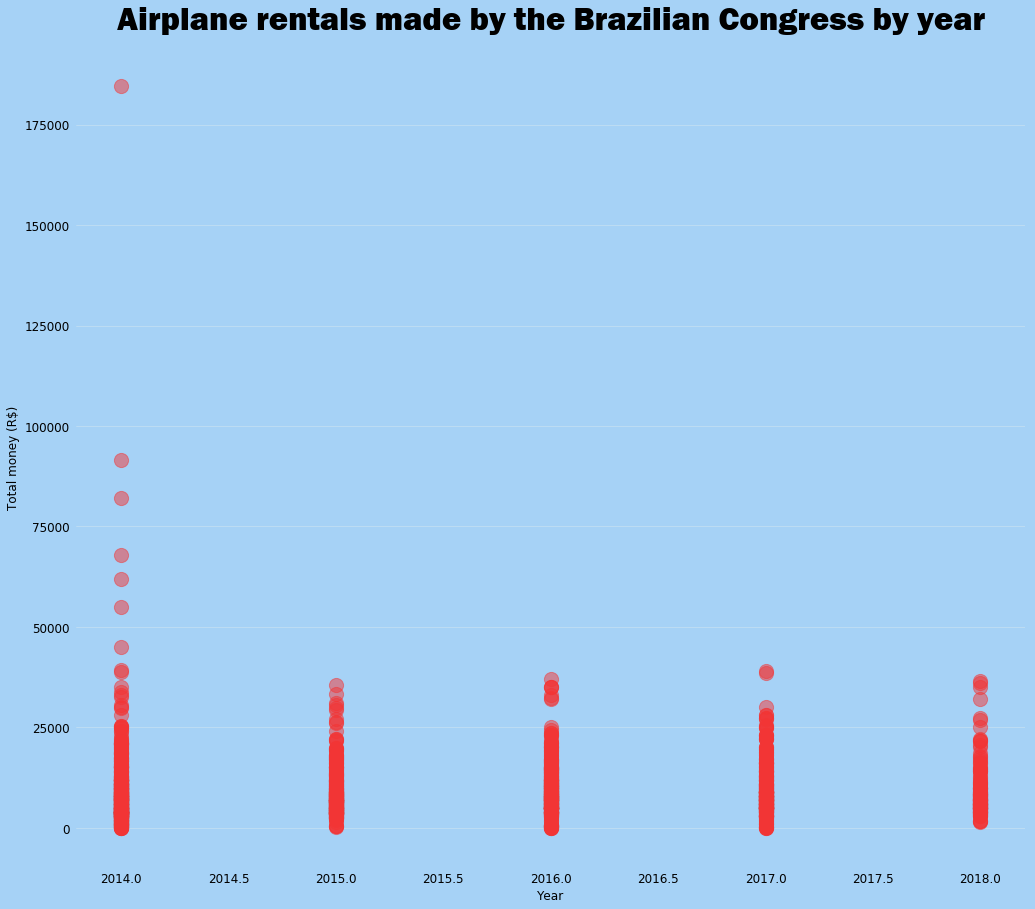

In [160]:
ax = df_2014_2018.plot.scatter(s=200, x='numano', y='vlrliquido', color='#f33535', alpha=0.5, figsize=(17,15))
ax.set_title('Airplane rentals made by the Brazilian Congress by year', pad=20)
ax.set_ylabel('Total money (R$)')    
ax.set_xlabel('Year')
ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
#ax.set_facecolor('#A6D2F6')

ax.grid(True, axis='y', color='#d8e9f0', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#33425b', # colors the outside
    'axes.facecolor': '#33425b', # colors the inside 
    'font.size': 12,
    'text.color': '#d8e9f0',
    'axes.labelcolor': '#d8e9f0'
})

sharex=False 


#plt.savefig('airplanes.pdf')


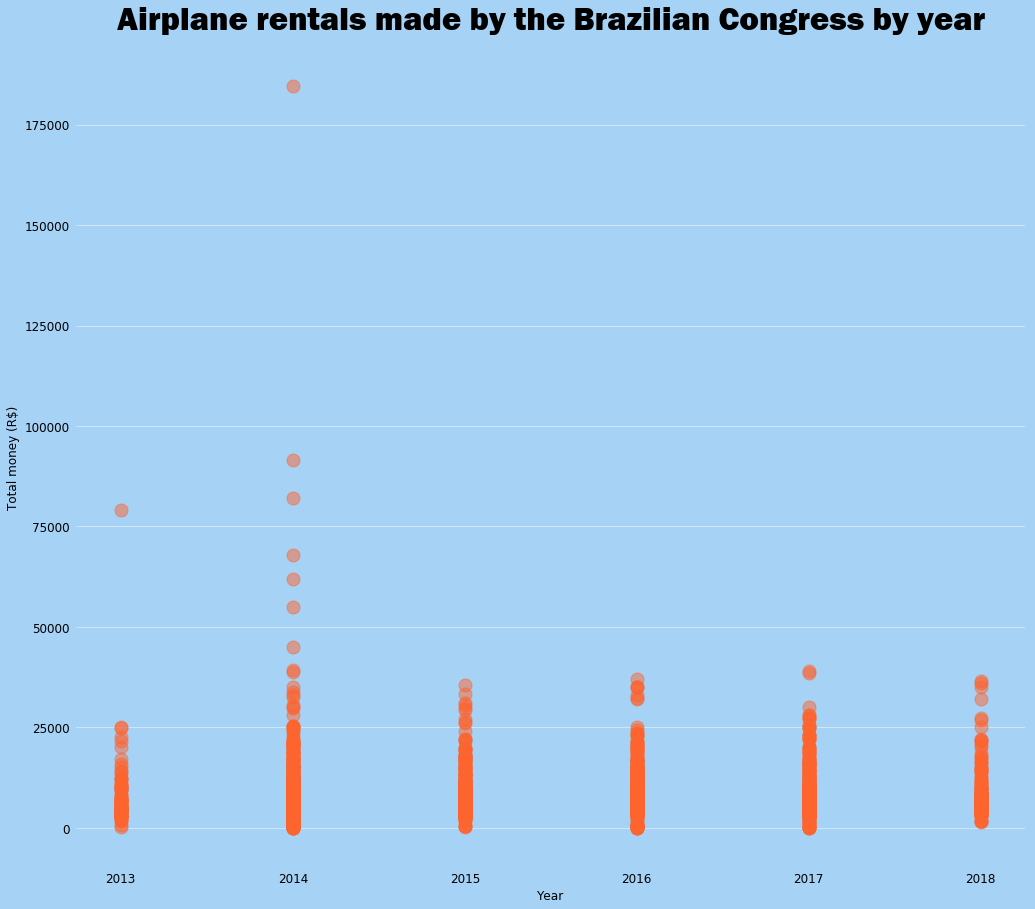

In [162]:
ax = df.plot.scatter(s=170, x='numano', y='vlrliquido', color='#FE642E', alpha=0.5, figsize=(17,15))
ax.set_title('Airplane rentals made by the Brazilian Congress by year', pad=20, color='black')
ax.set_ylabel('Total money (R$)')    
ax.set_xlabel('Year')
ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
#ax.set_facecolor('#A6D2F6')

ax.grid(True, axis='y', color='white', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#A6D2F6', # colors the outside
    'axes.facecolor': '#A6D2F6', # colors the inside 
    'font.size': 12,
    'text.color': 'black',
    'axes.labelcolor': 'black'
})

sharex=False 


#plt.savefig('airplanes.pdf')


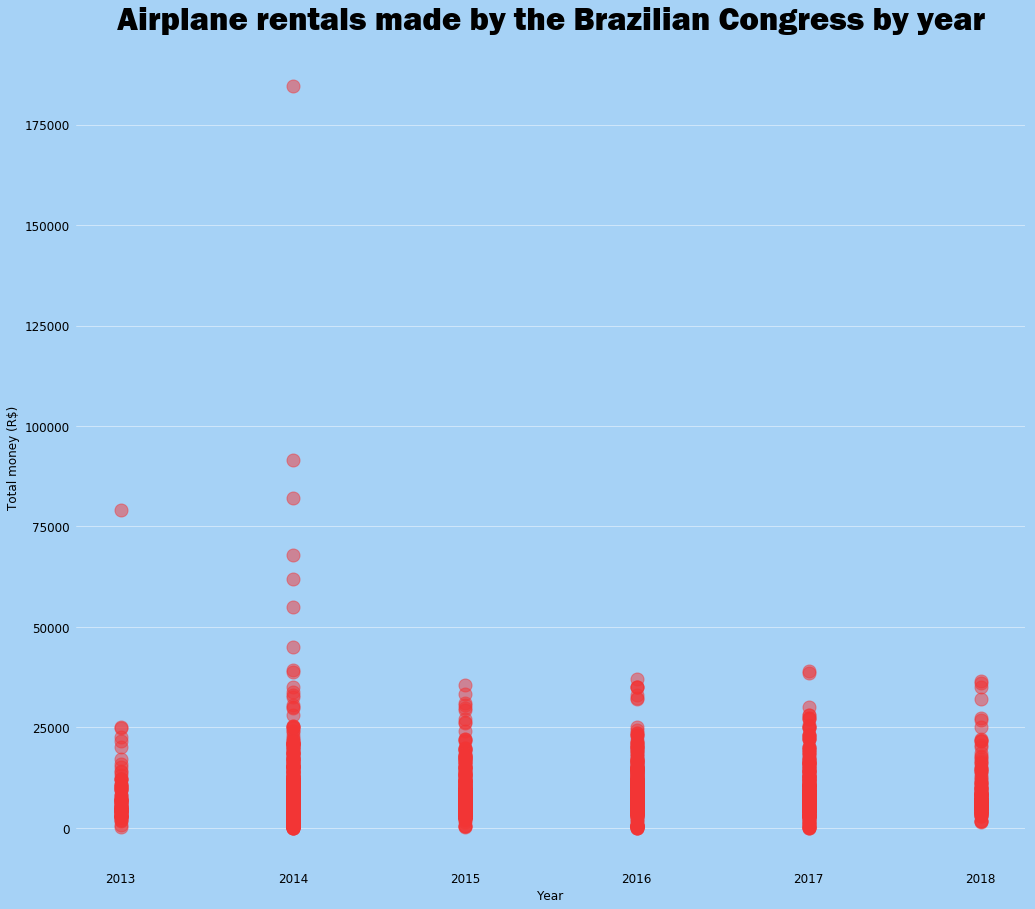

In [152]:
ax = df.plot.scatter(s=170, x='numano', y='vlrliquido', color='#f33535', alpha=0.5, figsize=(17,15))
ax.set_title('Airplane rentals made by the Brazilian Congress by year', pad=20, color='black')
ax.set_ylabel('Total money (R$)')    
ax.set_xlabel('Year')
ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
#ax.set_facecolor('#A6D2F6')

ax.grid(True, axis='y', color='white', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#A6D2F6', # colors the outside
    'axes.facecolor': '#A6D2F6', # colors the inside 
    'font.size': 12,
    'text.color': 'black',
    'axes.labelcolor': 'black'
})

sharex=False 


#plt.savefig('airplanes.pdf')


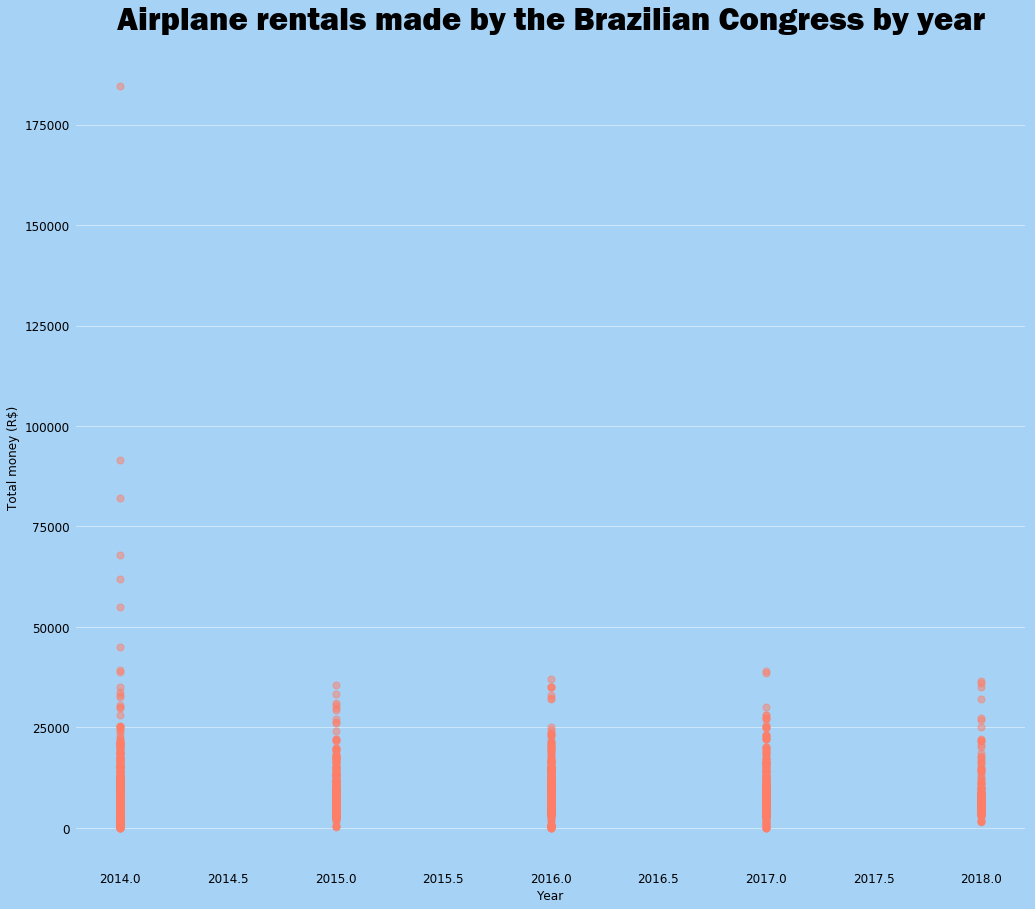

In [149]:
ax = df_2014_2018.plot.scatter(s=50, x='numano', y='vlrliquido', color='#ff7e67', alpha=0.5, figsize=(17,15))
ax.set_title('Airplane rentals made by the Brazilian Congress by year', pad=20)
ax.set_ylabel('Total money (R$)')    
ax.set_xlabel('Year')
ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
#ax.set_facecolor('#A6D2F6')

ax.grid(True, axis='y', color='white', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#07689f', # colors the outside
    'axes.facecolor': '#07689f', # colors the inside 
    'font.size': 12,
    'text.color': '#fafafa',
    'axes.labelcolor': '#fafafa'
})

sharex=False 


#plt.savefig('airplanes.pdf')


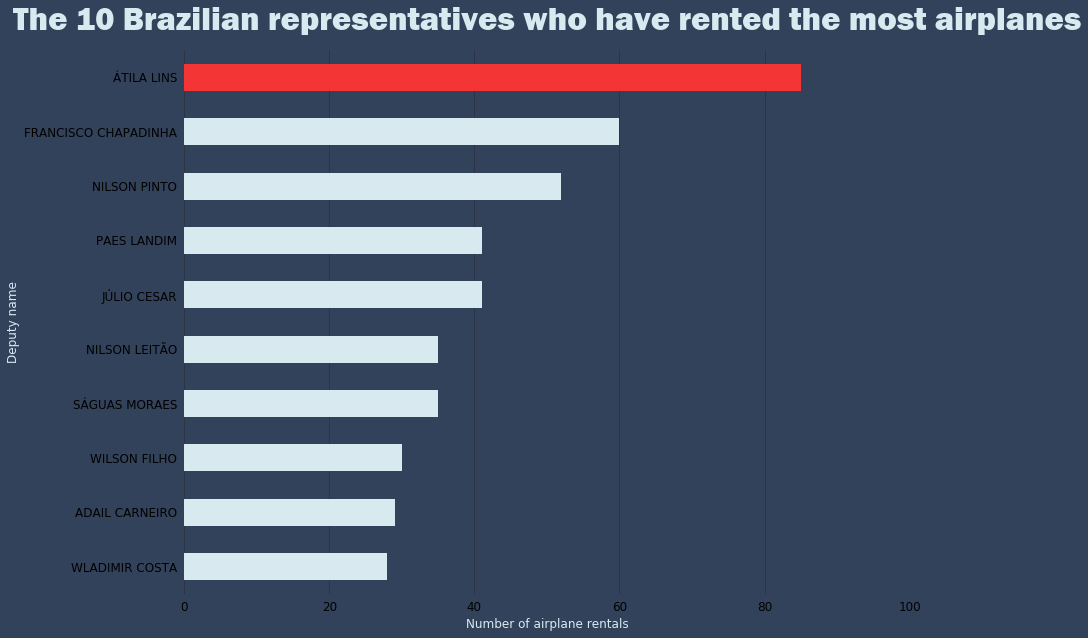

In [33]:
bar_colors = ['#d8e9f0', '#d8e9f0', '#d8e9f0', '#d8e9f0', '#d8e9f0', '#d8e9f0', '#d8e9f0', '#d8e9f0', '#d8e9f0', '#f33535']

ax = df_2014_2018.txnomeparlamentar.value_counts().head(10).sort_values(ascending=True).plot(kind='barh', color=bar_colors, figsize=(13,10))
ax.set_title('The 10 Brazilian representatives who have rented the most airplanes', pad=20)
ax.title.set_fontsize(17)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('Deputy name')    
ax.set_xlabel('Number of airplane rentals')
ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
ax.grid(True, axis='x', color='#29252c', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)
ax.set_xlim(0,100)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#33425b', # colors the outside
    'axes.facecolor': '#33425b', # colors the inside 
    'font.size': 12,
    'text.color': '#d8e9f0',
    'axes.labelcolor': '#d8e9f0'
})

#plt.savefig('representatives.pdf')